## Прогнозирование индекса массы тела человека по его возрасту

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl

In [46]:
df_base = pd.read_csv('ChickWeight.csv')[['Diet', 'Time','weight', 'Chick']]
df = df_base.loc[df_base['Diet'] == 4][['Time','weight', 'Chick']]
df.describe()

,Time,weight,Chick
count,118.000000,118.000000,118.000000
mean,10.754237,135.262712,45.525424
std,6.744338,68.828714,2.902141
min,0.000000,39.000000,41.000000
25%,4.500000,71.250000,43.000000
50%,10.000000,129.500000,46.000000
75%,16.000000,184.750000,48.000000
max,21.000000,322.000000,50.000000


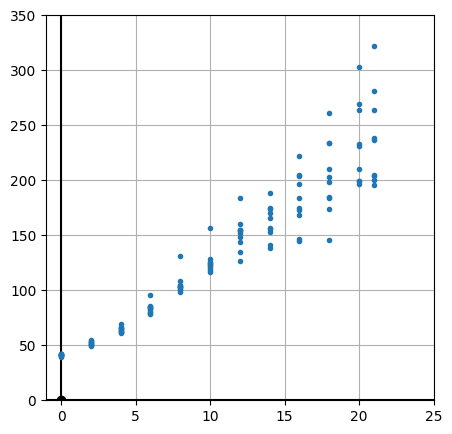

In [53]:
plt.figure(figsize=(5,5))

plt.xlim(-1, 25)
plt.ylim(0, 350)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-1, 350), np.arange(-1, 350)*0, "-", color='black')
plt.plot(np.arange(-1, 350)*0, np.arange(-1, 350), "-", color='black')

plt.plot(df['Time'], df['weight'],'.')

plt.show()

### Грубое решение

In [55]:
X = df.drop(columns = ['Chick','weight']).to_numpy()
y = df[['weight']].to_numpy()
model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9060834623555961

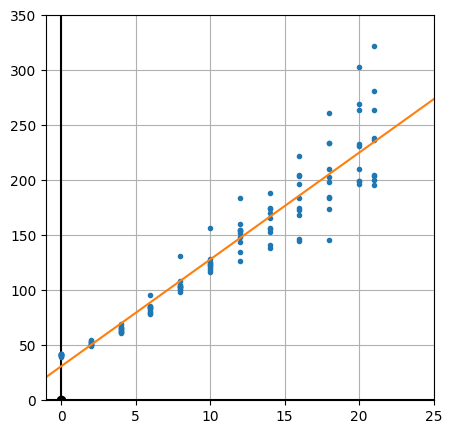

In [57]:
df_pred = pd.DataFrame()
df_pred['a'] = np.arange(-1, 26)
X_pred = df_pred.to_numpy()

plt.figure(figsize=(5,5))

plt.xlim(-1, 25)
plt.ylim(0, 350)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-1, 350), np.arange(-1, 350)*0, "-", color='black')
plt.plot(np.arange(-1, 350)*0, np.arange(-1, 350), "-", color='black')

plt.plot(df['Time'], df['weight'],'.')
plt.plot(X_pred, model.predict(X_pred),'-')

plt.show()

### Более точное решение

In [77]:
#Генерация признаков
df['Time^2'] = df['Time']**2
df

,Time,weight,Chick,Time^2
460,0,42,41,0
461,2,51,41,4
462,4,66,41,16
463,6,85,41,36
464,8,103,41,64
...,...,...,...,...
573,14,175,50,196
574,16,205,50,256
575,18,234,50,324
576,20,264,50,400


In [78]:
X = df.drop(columns = ['Chick','weight']).to_numpy()
y = df[['weight']].to_numpy()
model = skl.LinearRegression()
model.fit(X, y)
model.score(X, y)

0.9088219413303482

In [79]:
model.coef_

array([[7.75821426, 0.09184135]])

In [80]:
model.intercept_

array([37.06514928])

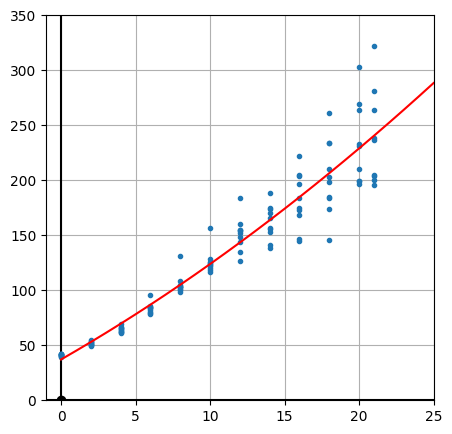

In [87]:
df_pred = pd.DataFrame()
df_pred['a'] = np.arange(0, 26)
df_pred['a^2'] = df_pred['a']**2
X_pred = df_pred.to_numpy()

plt.figure(figsize=(5,5))

plt.xlim(-1, 25)
plt.ylim(0, 350)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-1, 350), np.arange(-1, 350)*0, "-", color='black')
plt.plot(np.arange(-1, 350)*0, np.arange(-1, 350), "-", color='black')

plt.plot(df['Time'], df['weight'],'.')
plt.plot(np.arange(0, 26), model.predict(X_pred),'-', color='red')

plt.show()

### Изящное решение

In [92]:
df_even = df.loc[df['Chick'] % 2 == 0] # четные цыплята
df_odd = df.loc[df['Chick'] % 2 != 0] # нечетные цыплята

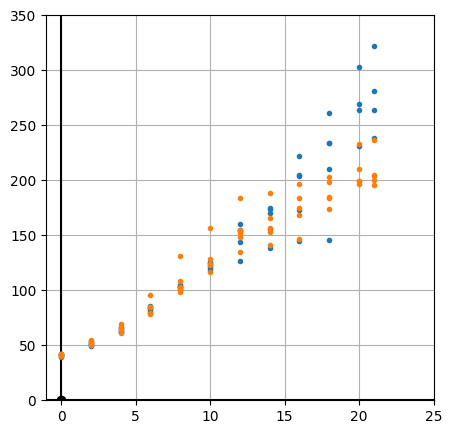

In [94]:
plt.figure(figsize=(5,5))

plt.xlim(-1, 25)
plt.ylim(0, 350)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-1, 350), np.arange(-1, 350)*0, "-", color='black')
plt.plot(np.arange(-1, 350)*0, np.arange(-1, 350), "-", color='black')

plt.plot(df_even['Time'], df_even['weight'],'.')
plt.plot(df_odd['Time'], df_odd['weight'],'.')

plt.show()

In [95]:
X_even = df_even.drop(columns = ['Chick','weight']).to_numpy()
y_even = df_even[['weight']].to_numpy()
model_even = skl.LinearRegression()
model_even.fit(X_even, y_even)
model_even.score(X_even, y_even)

0.9398608466373524

In [96]:
X_odd = df_odd.drop(columns = ['Chick','weight']).to_numpy()
y_odd = df_odd[['weight']].to_numpy()
model_odd = skl.LinearRegression()
model_odd.fit(X_odd, y_odd)
model_odd.score(X_odd, y_odd)

0.9516742196949276

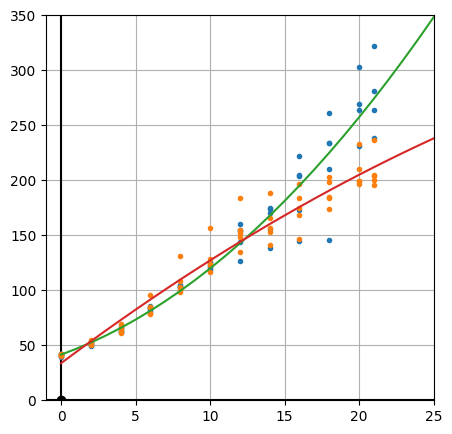

In [97]:
df_pred = pd.DataFrame()
df_pred['a'] = np.arange(0, 26)
df_pred['a^2'] = df_pred['a']**2
X_pred = df_pred.to_numpy()

plt.figure(figsize=(5,5))

plt.xlim(-1, 25)
plt.ylim(0, 350)
plt.grid()
plt.plot(0,0, "o", color='black')
plt.plot(np.arange(-1, 350), np.arange(-1, 350)*0, "-", color='black')
plt.plot(np.arange(-1, 350)*0, np.arange(-1, 350), "-", color='black')

plt.plot(df_even['Time'], df_even['weight'],'.')
plt.plot(df_odd['Time'], df_odd['weight'],'.')

plt.plot(np.arange(0, 26), model_even.predict(X_pred),'-')
plt.plot(np.arange(0, 26), model_odd.predict(X_pred),'-')

plt.show()